In [1]:
#Exploring the files created by Helen Seroussi for ISMIP6, as part of CMIP6 hackathon paper
#Author S Buzzard 
#Last modified 30/09/21

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from pathlib import Path


#SMB files are in kg/s, total files are in Gt
#Convert SMB- multiply by 31536000 (seconds in a yr), divide by 1000000000000 (kg in a Gt)? (=mutiply by .000031536)
#No data for ILTS_PIK_SICOPOLIS1, VUB_AISMPALEO

#TODO:
#SMB files are out by half a year (won't impact results but need to fix)

#To think about:
#Why do some runs have different values at 2015?
#How does dynamic loss equate to grounded vs non-grounded ice? This is separated in SMB
#Presenting these as mmSLE masks the fact that not all models start at zero (doesn't change trend but worth remembering)

AWI_PISM1_expB2
AWI_PISM1_expB7
JPL1_ISSM_expB2
JPL1_ISSM_expB7
LSCE_GRISLI_expB2
LSCE_GRISLI_expB7
NCAR_CISM_expB2
NCAR_CISM_expB7
UCIJPL_ISSM_expB2
UCIJPL_ISSM_expB7


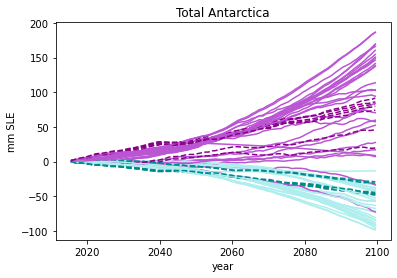

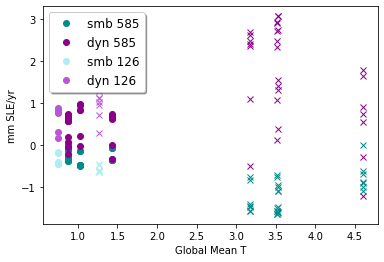

In [10]:
#Total Antarctica- all models
smb_585=[]
dyn_585=[]
smb_126=[]
dyn_126=[]
temp_585_2050=[]
temp_585_2100=[]
temp_126_2050=[]
temp_126_2100=[]
smb_585_rate=[]
dyn_585_rate=[]
smb_126_rate=[]
dyn_126_rate=[]

#Average temps by experiment number
#Previous values
#exp_avg_temp_2050=[0.949585,0.796631,1.46893,1.04221,0.971954,0.949585,0.796631,1.46893,1.04221,0.971954]
#exp_avg_temp_2100=[3.60321,1.30756,4.63235,3.61523,3.37021,3.60321,1.30756,4.63235,3.61523,3.37021]
#Updated values- is it ok these are the same with different ocean forcings?
exp_avg_temp_2050=[0.869928748,0.750932175,1.430913269,1.023571058,0.87846388,0.869928748,0.750932175,1.430913269,1.023571058,0.87846388]
exp_avg_temp_2100=[3.519435641,1.262085423,4.596253495,3.532289827,3.170217088,3.519435641,1.262085423,4.596253495,3.532289827,3.170217088]

for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smbgr_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-(ds['smbgr'][:85]*.000031536)/361#If SMB is -ve thats a +ve SLR contribution
                smb_585_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_585.append(smb_cum)
               

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=(ds['limnsw_total_antarctica'][:85]/361)-smb_cum
                dyn_585.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_585_rate.append(dyn_rate)
                
                temp_585_2050.append(exp_avg_temp_2050[exp-1])
                temp_585_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,color='paleturquoise')
                plt.plot(time,dyn_cum,color='mediumorchid')
                
                
            
                
        for exp in (2,7):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smbgr_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            print(model+'_expB'+str(exp))
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-(ds['smbgr'][:85]*.000031536)/361
                smb_126_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_126.append(smb_cum)

   

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=(ds['limnsw_total_antarctica'][:85]/361)-smb_cum
                dyn_126.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_126_rate.append(dyn_rate)
                
                temp_126_2050.append(exp_avg_temp_2050[exp-1])
                temp_126_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,'--',color='darkcyan')
                plt.plot(time,dyn_cum,'--',color='darkmagenta')
                
plt.title('Total Antarctica')
plt.ylabel('mm SLE')
plt.xlabel('year')
plt.savefig('Whole_AA_timeseries.jpg')
plt.show()

#Average rate of change for 2050 and for 2100 vs Temperature 

smb_585_mean_2050=[]
smb_585_mean_2100=[]
smb_126_mean_2050=[]
smb_126_mean_2100=[]
dyn_585_mean_2050=[]
dyn_585_mean_2100=[]
dyn_126_mean_2050=[]
dyn_126_mean_2100=[]

for i in range (len(smb_585)):
    smb_585_mean_2050.append(np.average(smb_585_rate[i][:35]))
    smb_585_mean_2100.append(np.average(smb_585_rate[i][35:]))
    dyn_585_mean_2050.append(np.average(dyn_585_rate[i][:35]))
    dyn_585_mean_2100.append(np.average(dyn_585_rate[i][35:]))   
for i in range (len(smb_126)):
    smb_126_mean_2050.append(np.average(smb_126_rate[i][:35]))
    smb_126_mean_2100.append(np.average(smb_126_rate[i][35:]))
    dyn_126_mean_2050.append(np.average(dyn_126_rate[i][:35]))
    dyn_126_mean_2100.append(np.average(dyn_126_rate[i][35:]))
    
    
plt.plot(temp_585_2050,smb_585_mean_2050,'o',color='darkcyan', label='smb 585')
plt.plot(temp_585_2100,smb_585_mean_2100,'x',color='darkcyan')
plt.plot(temp_585_2050,dyn_585_mean_2050,'o',color='darkmagenta', label='dyn 585')
plt.plot(temp_585_2100,dyn_585_mean_2100,'x',color='darkmagenta')
plt.plot(temp_126_2050,smb_126_mean_2050,'o',color='paleturquoise', label='smb 126')
plt.plot(temp_126_2100,smb_126_mean_2100,'x',color='paleturquoise')
plt.plot(temp_126_2050,dyn_126_mean_2050,'o',color='mediumorchid', label='dyn 126')
plt.plot(temp_126_2100,dyn_126_mean_2100,'x',color='mediumorchid')
plt.ylabel('mm SLE/yr')
plt.xlabel('Global Mean T')
plt.savefig('SLRvT_AllAa.jpg')
plt.legend(loc='upper left', shadow=True, fontsize='large')
    
plt.show()


  
   
 
with open('Antarctica_585_means.csv','a') as csvfile:
    np.savetxt(csvfile, np.column_stack([smb_585_mean_2050,smb_585_mean_2100,dyn_585_mean_2050,dyn_585_mean_2100,temp_585_2050,temp_585_2100]),delimiter=',',header='smb_2050, smb_2100, dyn_2050, dyn_100, T_avg_2050, T_avg_2100',fmt='%s', comments='')

with open('Antarctica_126_means.csv','a') as csvfile:
    np.savetxt(csvfile, np.column_stack([smb_126_mean_2050,smb_126_mean_2100,dyn_126_mean_2050,dyn_126_mean_2100,temp_126_2050,temp_126_2100]),delimiter=',',header='smb_2050, smb_2100, dyn_2050, dyn_100, T_avg_2050, T_avg_2100',fmt='%s', comments='')




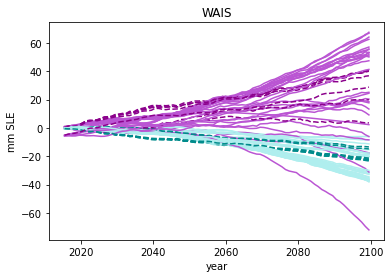

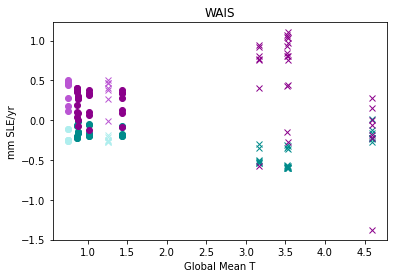

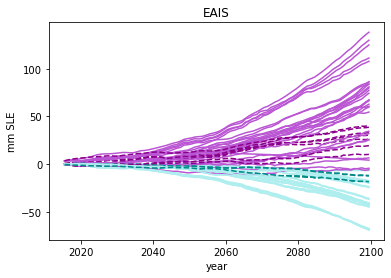

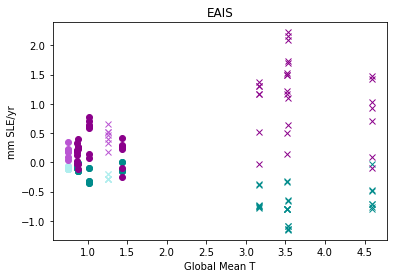

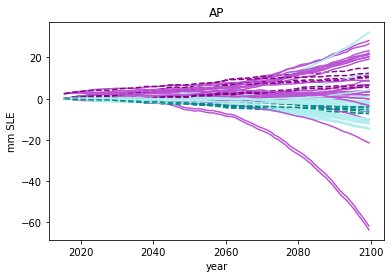

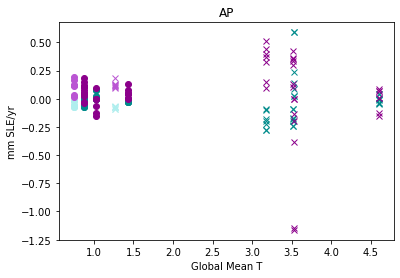

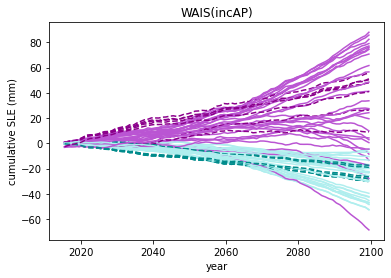

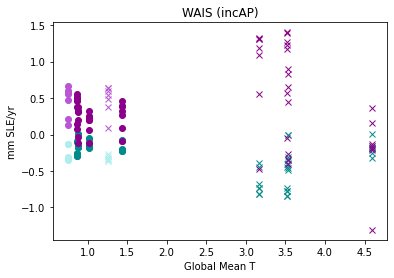

In [11]:
#By regions- all models
#Region 1 is WAIS, 2 is EAIS and 3 is AP
region_names=['WAIS','EAIS','AP']
for region in range(1,4):
    smb_585=[]
    dyn_585=[]
    smb_126=[]
    dyn_126=[]
    temp_585_2050=[]
    temp_585_2100=[]
    temp_126_2050=[]
    temp_126_2100=[]
    smb_585_rate=[]
    dyn_585_rate=[]
    smb_126_rate=[]
    dyn_126_rate=[]
    for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
            for exp in (1,3,4,5,6,8,9,10):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smbgr_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_rate=-(ds['smbgr_region_'+str(region)][:85]*.000031536)/361
                    smb_585_rate.append(smb_rate)
                    smb_cum=np.zeros(len(smb_rate))
                    smb_cum[0]=smb_rate[0]
                    for i in range(len(smb_rate)-1):
                        smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                    smb_585.append(smb_cum)




                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_cum=(ds['limnsw_region_'+str(region)][:85]/361)-smb_cum
                    dyn_585.append(dyn_cum)
                    dyn_rate=np.zeros(len(dyn_cum))
                    dyn_rate[0]=dyn_cum[0]
                    for i in range(len(dyn_rate)-1):
                        dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                    dyn_585_rate.append(dyn_rate)

                    temp_585_2050.append(exp_avg_temp_2050[exp-1])
                    temp_585_2100.append(exp_avg_temp_2100[exp-1])
                    plt.plot(time,smb_cum,color='paleturquoise')
                    plt.plot(time,dyn_cum,color='mediumorchid')
            
                    
            for exp in (2,7):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smbgr_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_rate=-(ds['smbgr_region_'+str(region)][:85]*.000031536)/361
                    smb_126_rate.append(smb_rate)
                    smb_cum=np.zeros(len(smb_rate))
                    smb_cum[0]=smb_rate[0]
                    for i in range(len(smb_rate)-1):
                        smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                    smb_126.append(smb_cum)

                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_cum=(ds['limnsw_region_'+str(region)][:85]/361)-smb_cum
                    dyn_126.append(dyn_cum)
                    dyn_rate=np.zeros(len(dyn_cum))
                    dyn_rate[0]=dyn_cum[0]
                    for i in range(len(dyn_rate)-1):
                        dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                    dyn_126_rate.append(dyn_rate)
                    
                    temp_126_2050.append(exp_avg_temp_2050[exp-1])
                    temp_126_2100.append(exp_avg_temp_2100[exp-1])
                    plt.plot(time,smb_cum,'--',color='darkcyan')
                    plt.plot(time,dyn_cum,'--',color='darkmagenta')

    plt.title(region_names[region-1])
    plt.ylabel('mm SLE')
    plt.xlabel('year')
    plt.savefig('Timeseries_'+region_names[region-1]+'.jpg')
    plt.show()
    
                #Average rate of change for 2050 and for 2100 vs Temperature 

    smb_585_mean_2050=[]
    smb_585_mean_2100=[]
    smb_126_mean_2050=[]
    smb_126_mean_2100=[]
    dyn_585_mean_2050=[]
    dyn_585_mean_2100=[]
    dyn_126_mean_2050=[]
    dyn_126_mean_2100=[]

    for i in range (len(smb_585)):
        smb_585_mean_2050.append(np.average(smb_585_rate[i][:35]))
        smb_585_mean_2100.append(np.average(smb_585_rate[i][35:]))
        dyn_585_mean_2050.append(np.average(dyn_585_rate[i][:35]))
        dyn_585_mean_2100.append(np.average(dyn_585_rate[i][35:]))   
    for i in range (len(smb_126)):
        smb_126_mean_2050.append(np.average(smb_126_rate[i][:35]))
        smb_126_mean_2100.append(np.average(smb_126_rate[i][35:]))
        dyn_126_mean_2050.append(np.average(dyn_126_rate[i][:35]))
        dyn_126_mean_2100.append(np.average(dyn_126_rate[i][35:]))


    plt.plot(temp_585_2050,smb_585_mean_2050,'o',color='darkcyan', label='smb 585')
    plt.plot(temp_585_2100,smb_585_mean_2100,'x',color='darkcyan')
    plt.plot(temp_585_2050,dyn_585_mean_2050,'o',color='darkmagenta', label='dyn 585')
    plt.plot(temp_585_2100,dyn_585_mean_2100,'x',color='darkmagenta')
    plt.plot(temp_126_2050,smb_126_mean_2050,'o',color='paleturquoise', label='smb 126')
    plt.plot(temp_126_2100,smb_126_mean_2100,'x',color='paleturquoise')
    plt.plot(temp_126_2050,dyn_126_mean_2050,'o',color='mediumorchid', label='dyn 126')
    plt.plot(temp_126_2100,dyn_126_mean_2100,'x',color='mediumorchid')
    plt.ylabel('mm SLE/yr')
    plt.title(region_names[region-1])
    plt.xlabel('Global Mean T')
    plt.savefig('SLRvT_'+region_names[region-1]+'.jpg')
    #plt.legend(loc='upper left', shadow=True, fontsize='large')

    plt.show()
    
    #with open(region_names[region-1]+'_585_means.csv','a') as csvfile:
    #    np.savetxt(csvfile, np.column_stack([smb_585_mean_2050,smb_585_mean_2100,dyn_585_mean_2050,dyn_585_mean_2100,temp_585_2050,temp_585_2100]),delimiter=',',header='smb_2050, smb_2100, dyn_2050, dyn_100, T_avg_2050, T_avg_2100',fmt='%s', comments='')

    #with open(region_names[region-1]+'_126_means.csv','a') as csvfile:
    #    np.savetxt(csvfile, np.column_stack([smb_126_mean_2050,smb_126_mean_2100,dyn_126_mean_2050,dyn_126_mean_2100,temp_126_2050,temp_126_2100]),delimiter=',',header='smb_2050, smb_2100, dyn_2050, dyn_100, T_avg_2050, T_avg_2100',fmt='%s', comments='')


    
#Combining WAIS and AP (regions 1 and 3)
    
smb_585=[]
dyn_585=[]
smb_126=[]
dyn_126=[]
temp_585_2050=[]
temp_585_2100=[]
temp_126_2050=[]
temp_126_2100=[]
smb_585_rate=[]
dyn_585_rate=[]
smb_126_rate=[]
dyn_126_rate=[]
for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smbgr_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-((ds['smbgr_region_1'][:85]+ds['smbgr_region_3'][:85])*.000031536)/361
                smb_585_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_585.append(smb_cum)




                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=((ds['limnsw_region_1'][:85]+ds['limnsw_region_3'][:85])/361)-smb_cum
                dyn_585.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_585_rate.append(dyn_rate)

                temp_585_2050.append(exp_avg_temp_2050[exp-1])
                temp_585_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,color='paleturquoise')
                plt.plot(time,dyn_cum,color='mediumorchid')


        for exp in (2,7):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smbgr_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-((ds['smbgr_region_1'][:85]+ds['smbgr_region_3'][:85])*.000031536)/361
                smb_126_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_126.append(smb_cum)

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=((ds['limnsw_region_1'][:85]+ds['limnsw_region_3'][:85])/361)-smb_cum
                dyn_126.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_126_rate.append(dyn_rate)

                temp_126_2050.append(exp_avg_temp_2050[exp-1])
                temp_126_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,'--',color='darkcyan')
                plt.plot(time,dyn_cum,'--',color='darkmagenta')

plt.title('WAIS(incAP)')
plt.ylabel('cumulative SLE (mm)')
plt.xlabel('year')
plt.savefig('Timeseries_WAIS(incAP).jpg')
plt.show()

            #Average rate of change for 2050 and for 2100 vs Temperature 

smb_585_mean_2050=[]
smb_585_mean_2100=[]
smb_126_mean_2050=[]
smb_126_mean_2100=[]
dyn_585_mean_2050=[]
dyn_585_mean_2100=[]
dyn_126_mean_2050=[]
dyn_126_mean_2100=[]

for i in range (len(smb_585)):
    smb_585_mean_2050.append(np.average(smb_585_rate[i][:35]))
    smb_585_mean_2100.append(np.average(smb_585_rate[i][35:]))
    dyn_585_mean_2050.append(np.average(dyn_585_rate[i][:35]))
    dyn_585_mean_2100.append(np.average(dyn_585_rate[i][35:]))   
for i in range (len(smb_126)):
    smb_126_mean_2050.append(np.average(smb_126_rate[i][:35]))
    smb_126_mean_2100.append(np.average(smb_126_rate[i][35:]))
    dyn_126_mean_2050.append(np.average(dyn_126_rate[i][:35]))
    dyn_126_mean_2100.append(np.average(dyn_126_rate[i][35:]))


plt.plot(temp_585_2050,smb_585_mean_2050,'o',color='darkcyan', label='smb 585')
plt.plot(temp_585_2100,smb_585_mean_2100,'x',color='darkcyan')
plt.plot(temp_585_2050,dyn_585_mean_2050,'o',color='darkmagenta', label='dyn 585')
plt.plot(temp_585_2100,dyn_585_mean_2100,'x',color='darkmagenta')
plt.plot(temp_126_2050,smb_126_mean_2050,'o',color='paleturquoise', label='smb 126')
plt.plot(temp_126_2100,smb_126_mean_2100,'x',color='paleturquoise')
plt.plot(temp_126_2050,dyn_126_mean_2050,'o',color='mediumorchid', label='dyn 126')
plt.plot(temp_126_2100,dyn_126_mean_2100,'x',color='mediumorchid')
plt.ylabel('mm SLE/yr')
plt.title('WAIS (incAP)')
plt.xlabel('Global Mean T')
plt.savefig('SLRvT_WAIS(incAP).jpg')

plt.show()

with open('WAISandAP_585_means.csv','a') as csvfile:
    np.savetxt(csvfile, np.column_stack([smb_585_mean_2050,smb_585_mean_2100,dyn_585_mean_2050,dyn_585_mean_2100,temp_585_2050,temp_585_2100]),delimiter=',',header='smb_2050, smb_2100, dyn_2050, dyn_100, T_avg_2050, T_avg_2100',fmt='%s', comments='')

with open('WAISandAP_126_means.csv','a') as csvfile:
    np.savetxt(csvfile, np.column_stack([smb_126_mean_2050,smb_126_mean_2100,dyn_126_mean_2050,dyn_126_mean_2100,temp_126_2050,temp_126_2100]),delimiter=',',header='smb_2050, smb_2100, dyn_2050, dyn_100, T_avg_2050, T_avg_2100',fmt='%s', comments='')




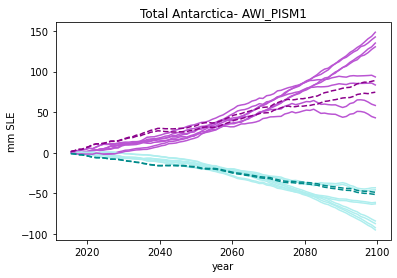

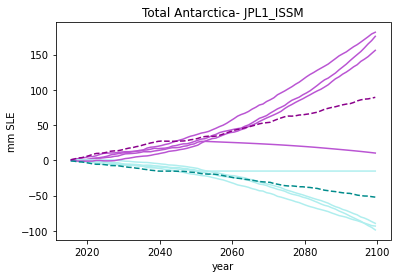

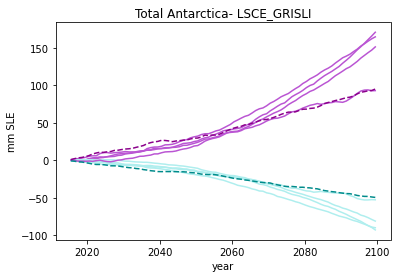

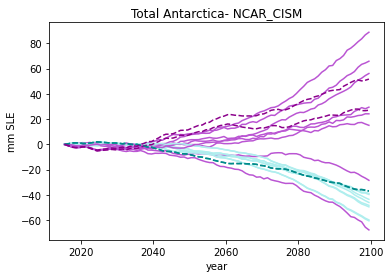

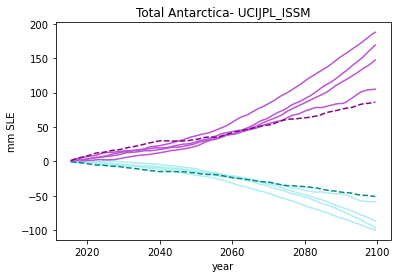

In [6]:
#Total Antarctica- by model
smb_585=[]
dyn_585=[]
smb_126=[]
dyn_126=[]
temp_585_2050=[]
temp_585_2100=[]
temp_126_2050=[]
temp_126_2100=[]
smb_585_rate=[]
dyn_585_rate=[]
smb_126_rate=[]
dyn_126_rate=[]


for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-(ds['smb'][:85]*.000031536)/361#If SMB is -ve thats a +ve SLR contribution
                smb_585_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_585.append(smb_cum)
               

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=(ds['limnsw_total_antarctica'][:85]/361)-smb_cum
                dyn_585.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_585_rate.append(dyn_rate)
                
                temp_585_2050.append(exp_avg_temp_2050[exp-1])
                temp_585_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,color='paleturquoise')
                plt.plot(time,dyn_cum,color='mediumorchid')
                
                
            
                
        for exp in (2,7):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-(ds['smb'][:85]*.000031536)/361
                smb_126_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_126.append(smb_cum)

   

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=(ds['limnsw_total_antarctica'][:85]/361)-smb_cum
                dyn_126.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_126_rate.append(dyn_rate)
                
                temp_126_2050.append(exp_avg_temp_2050[exp-1])
                temp_126_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,'--',color='darkcyan')
                plt.plot(time,dyn_cum,'--',color='darkmagenta')
                
        plt.title('Total Antarctica- '+model)
        plt.ylabel('mm SLE')
        plt.xlabel('year')
        plt.show()



In [59]:
#Experiments used

# SSP126:
# AWI_PISM1_expB2
# AWI_PISM1_expB7
# JPL1_ISSM_expB2
# JPL1_ISSM_expB7
# LSCE_GRISLI_expB2
# LSCE_GRISLI_expB7
# NCAR_CISM_expB2
# NCAR_CISM_expB7
# UCIJPL_ISSM_expB2
# UCIJPL_ISSM_expB7


#SSP585:

# AWI_PISM1_expB1
# AWI_PISM1_expB3
# AWI_PISM1_expB4
# AWI_PISM1_expB5
# AWI_PISM1_expB6
# AWI_PISM1_expB8
# AWI_PISM1_expB9
# AWI_PISM1_expB10
# JPL1_ISSM_expB6
# JPL1_ISSM_expB8
# JPL1_ISSM_expB9
# JPL1_ISSM_expB10
# LSCE_GRISLI_expB6
# LSCE_GRISLI_expB8
# LSCE_GRISLI_expB9
# LSCE_GRISLI_expB10
# NCAR_CISM_expB1
# NCAR_CISM_expB3
# NCAR_CISM_expB4
# NCAR_CISM_expB5
# NCAR_CISM_expB6
# NCAR_CISM_expB8
# NCAR_CISM_expB9
# NCAR_CISM_expB10
# UCIJPL_ISSM_expB6
# UCIJPL_ISSM_expB8
# UCIJPL_ISSM_expB9
# UCIJPL_ISSM_expB10

<ipython-input-7-66f9e084f54a>:25: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  smb=-(ds['smb'][:85]*.000031536)/361
<ipython-input-7-66f9e084f54a>:30: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  dyn=(-ds['sle'][:85]*1000)-smb
<ipython-input-7-66f9e084f54a>:25: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  smb=-(ds['smb'][:85]*.000031536)/361
<ipython-input-7-66f9e084f54a>:30: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  dyn=(-ds['sle'][:85]*1000)-smb
<ipython-input-7-66f9e084f54a>:47: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  smb=-(ds['smb'][:85]*.000031536)/361
<ipython-input-7-66f9e084f54a>:52: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  dyn=(-ds['sle'][:

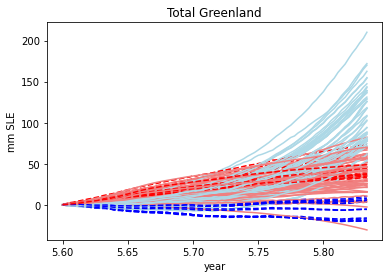

In [7]:
#Total Greenland- all models
#SMB included in GRL paper files
#Dynamic in *m* SLE already
#Time here is in days since 2015, or days since 1980, with a 360 or a 365 day calendar...
smb_585=[]
dyn_585=[]
smb_126=[]
dyn_126=[]
temp_585_2050=[]
temp_585_2100=[]
temp_126_2050=[]
temp_126_2100=[]

time=ds['time'][:85]/360


for model in ('AWI_ISSM1','AWI_ISSM2','AWI_ISSM3','BGC_BISICLES','GSFC_ISSM','ILTS_PIK_SICOPOLIS2','ILTS_PIK_SICOPOLIS3','IMAU_IMAUICE2','JPL_ISSM','JPL_ISSMPALEO','LSCE_GRISLI2','NCAR_CISM','UAF_PISM1','UAF_PISM2','UCIJPL_ISSM1','VUB_GISMHOMv1'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='project01_main/data/raw_data/GRL_paper_data/GrIS/Ice/'
            file=Path(fp+'scalars_mm_cr_GIS_'+model+'_expb'+f"{exp:02}"+'.nc')
            if file.is_file():
                ds=nc.Dataset(file)
                #time=ds['time'][:85]/360
                smb=-(ds['smb'][:85]*.000031536)/361
                for i in range(len(smb)-1):
                    smb[i+1]=smb[i]+smb[i+1]
                smb_585.append(smb)

                dyn=(-ds['sle'][:85]*1000)-smb
                dyn_585.append(dyn)
                
                temp_585_2050.append(exp_avg_temp_2050[exp-1])
                temp_585_2100.append(exp_avg_temp_2100[exp-1])
                
                plt.plot(time,smb,'lightblue')
                plt.plot(time,dyn,'lightcoral')
            
                
        for exp in (2,7):
            #import SMB files
            fp='project01_main/data/raw_data/GRL_paper_data/GrIS/Ice/'
            file=Path(fp+'scalars_mm_cr_GIS_'+model+'_expb'+f"{exp:02}"+'.nc')
            if file.is_file():
                ds=nc.Dataset(file)
                #time=ds['time'][:85]/360
                smb=-(ds['smb'][:85]*.000031536)/361
                for i in range(len(smb)-1):
                    smb[i+1]=smb[i]+smb[i+1]
                smb_126.append(smb)

                dyn=(-ds['sle'][:85]*1000)-smb
                dyn_126.append(dyn)
                
                temp_126_2050.append(exp_avg_temp_2050[exp-1])
                temp_126_2100.append(exp_avg_temp_2100[exp-1])
                #ssp_scenario.append(126)
                
                plt.plot(time,smb,'b--')
                plt.plot(time,dyn,'r--')
            
                
#plt.plot(time,np.average(smb_585, axis=0),'k')
#plt.plot(time,np.average(dyn_585, axis=0),'k')
#plt.plot(time,np.average(smb_126, axis=0),'k--')
#plt.plot(time,np.average(dyn_126, axis=0),'k--')
plt.title('Total Greenland')
plt.ylabel('mm SLE')
plt.xlabel('year')
plt.show()





In [2]:
#Aslak's ellipse code 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, n_std=1.0, weights=None, ax=None, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`
    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    if not ax:
        ax = plt.gca()

    if weights is None:
        cov = np.cov(x, y)
        mean_x = np.mean(x)
        mean_y = np.mean(y)
    else:
        cov = np.cov(x, y, aweights = weights)
        sumw = np.sum(weights)
        mean_x = np.sum(x*weights)/sumw
        mean_y = np.sum(y*weights)/sumw

    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=f'{facecolor}22', edgecolor=f'{facecolor}', **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    ax.set_xlim([0, 5])
    ax.set_ylim([-2, 2])

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)



#FROM https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy
def weighted_quantile(values, quantiles, sample_weight=None,
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)



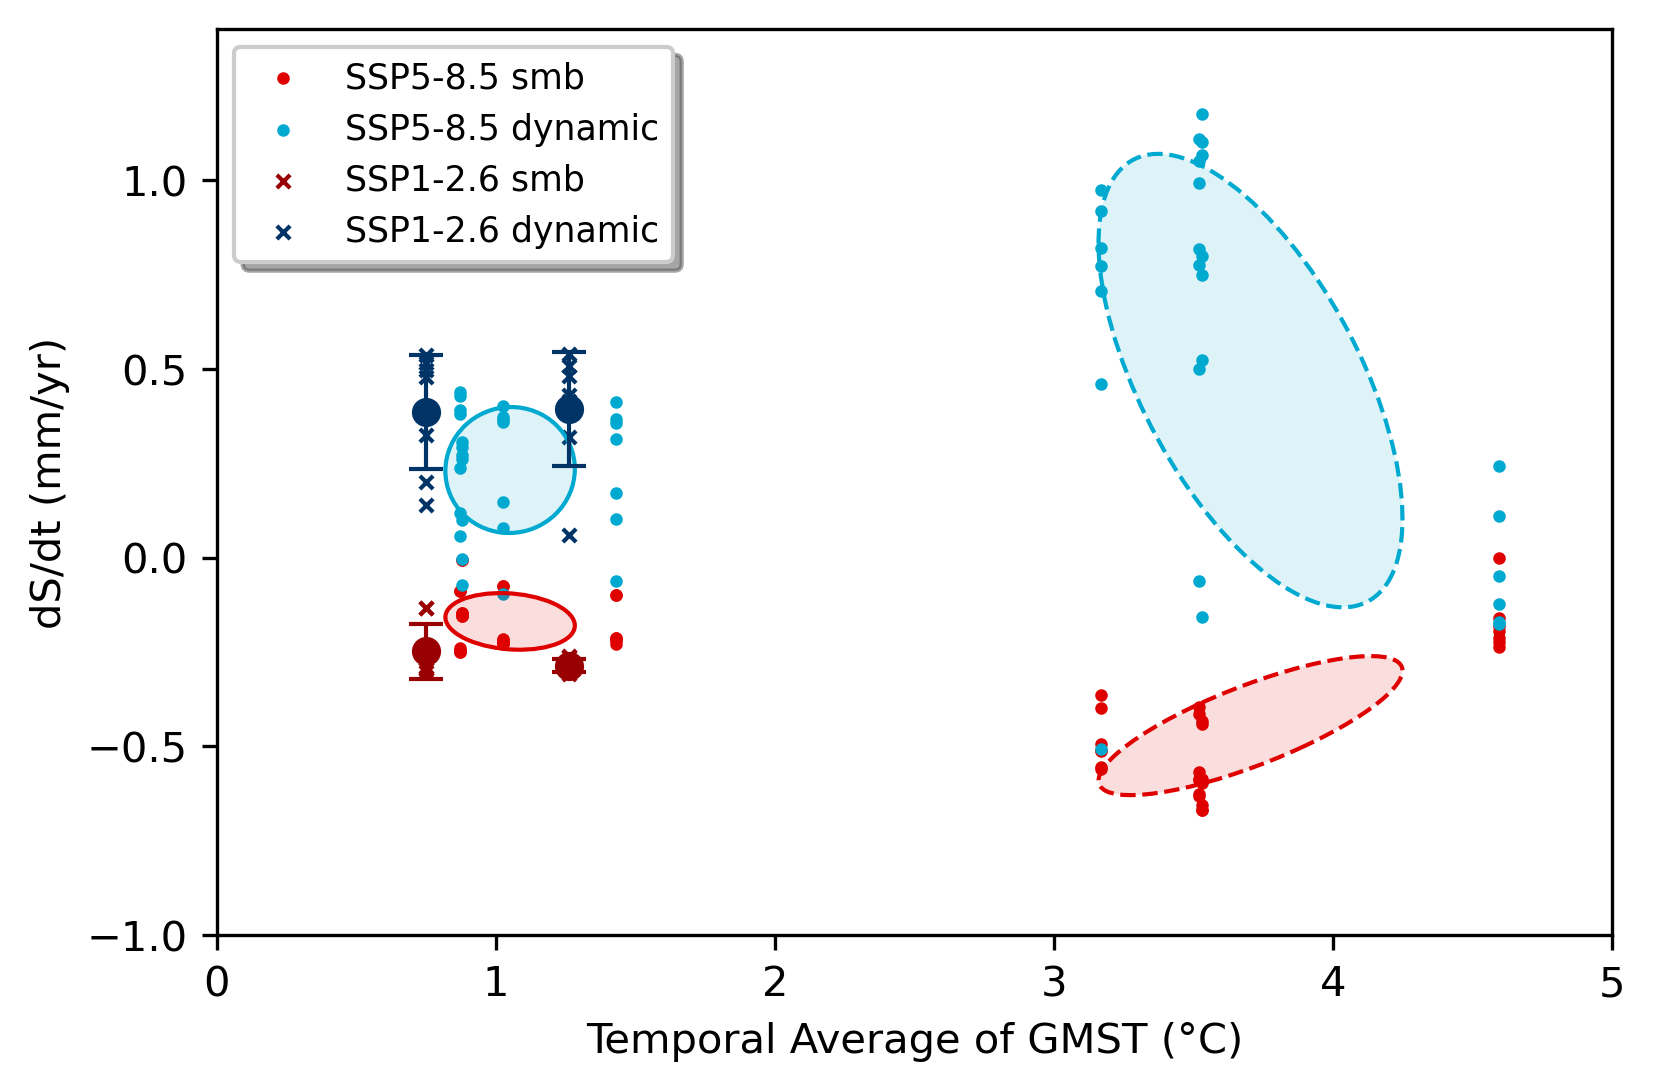

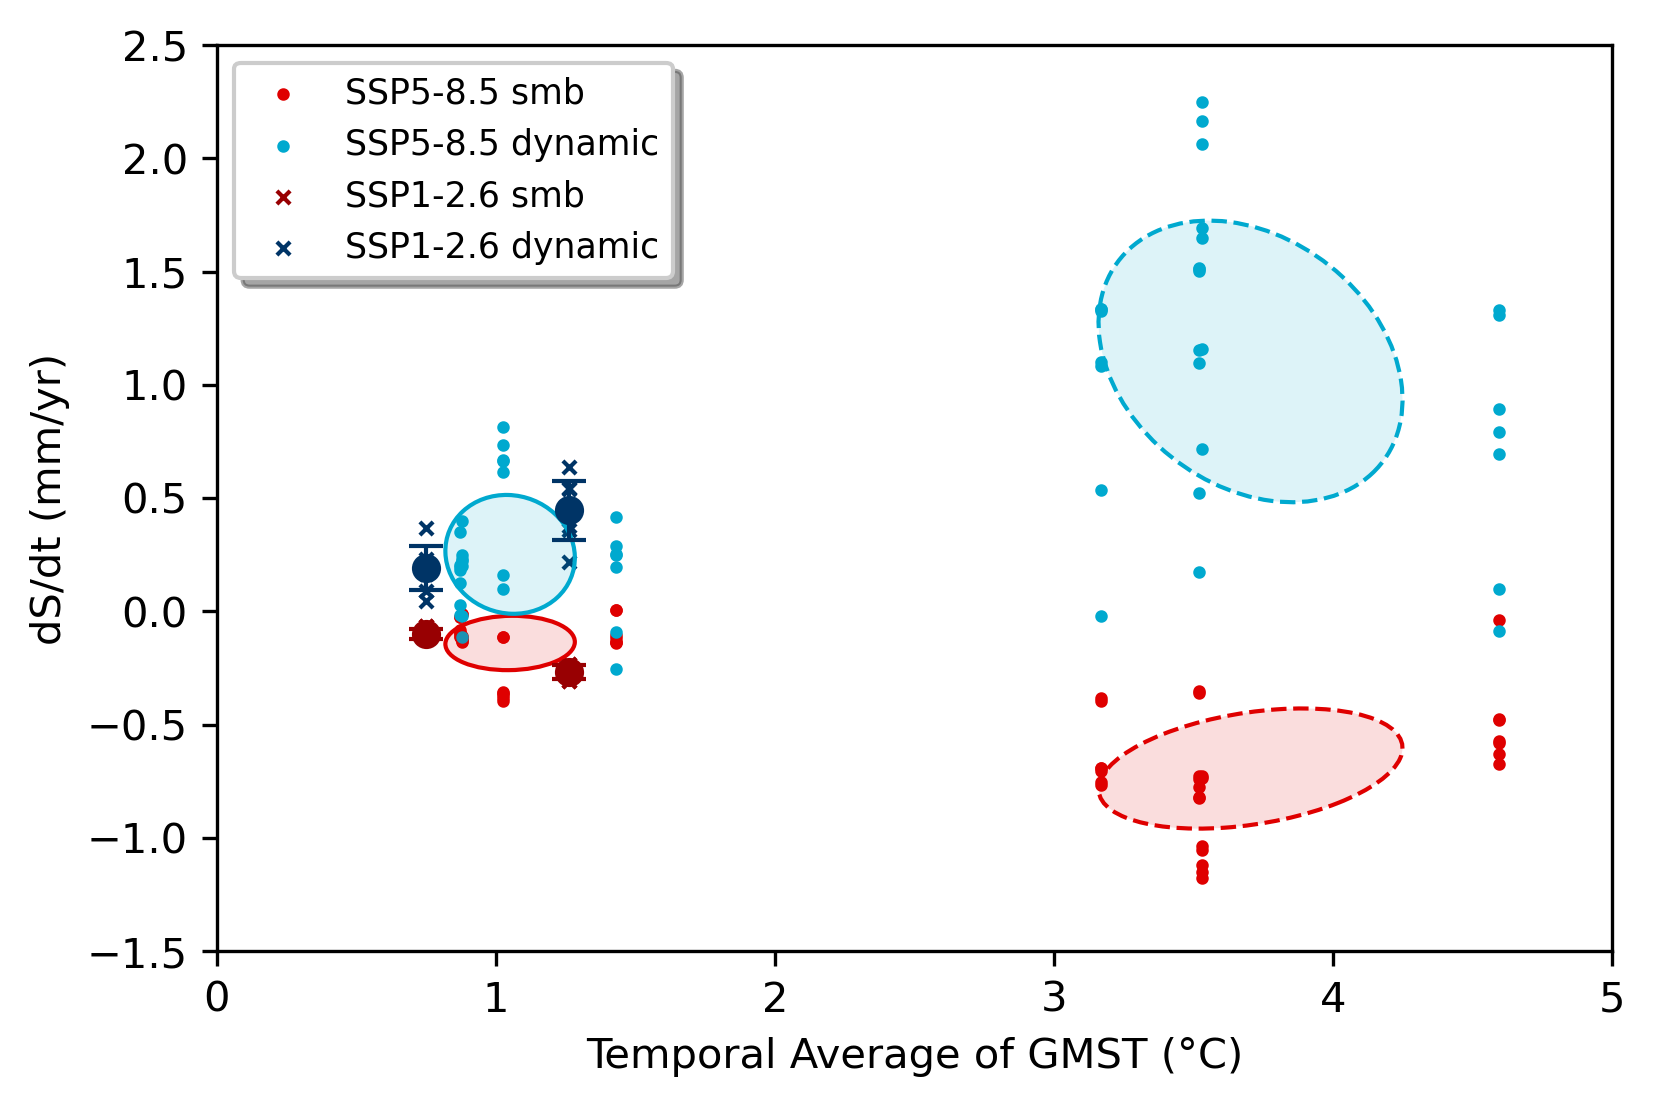

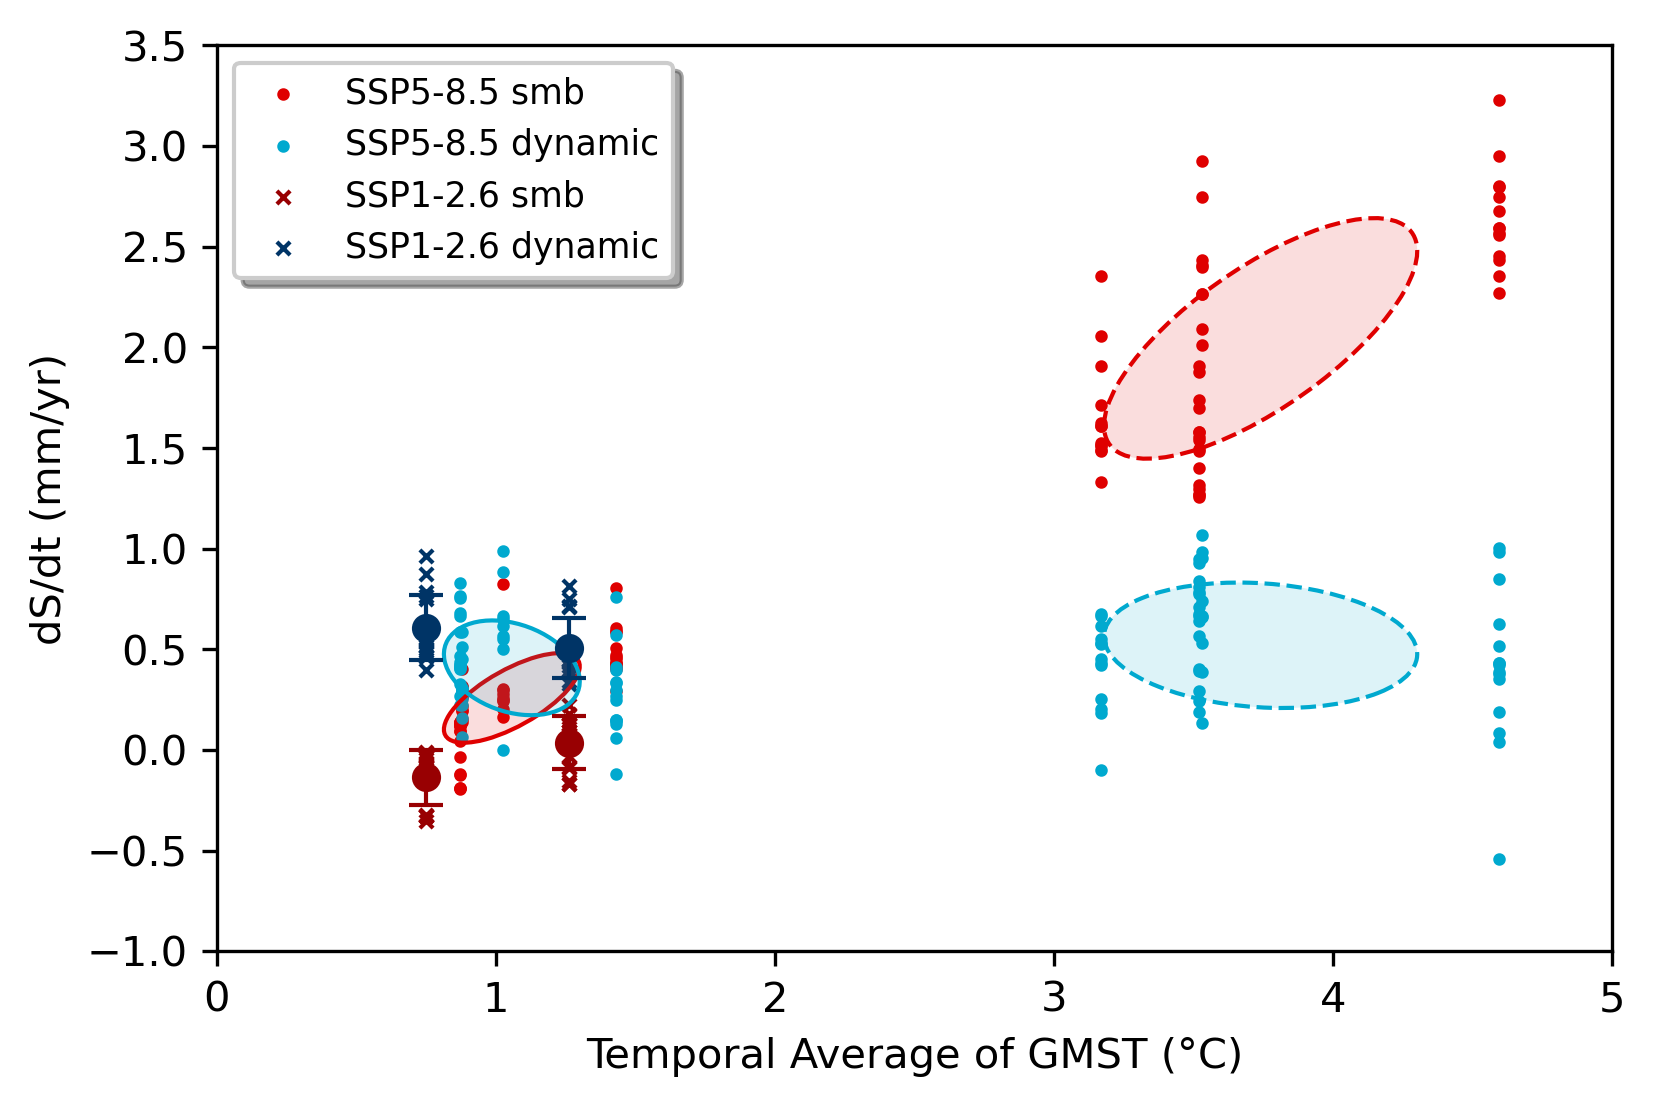

In [98]:
#Create ellipses from saved data
#Columns are smb_585_mean_2050,smb_585_mean_2100,dyn_585_mean_2050,dyn_585_mean_2100,temp_585_2050,temp_585_2100
wais=np.loadtxt('WAIS_585_means.csv',delimiter=',',skiprows=1)
y_smb_2050=wais[:,0]
y_smb_2100=wais[:,1]
y_dyn_2050=wais[:,2]
y_dyn_2100=wais[:,3]
x_2050=wais[:,4]
x_2100=wais[:,5]
confidence_ellipse(x_2050, y_smb_2050, facecolor="#df0000")
confidence_ellipse(x_2100, y_smb_2100, facecolor="#df0000",linestyle='--')
confidence_ellipse(x_2050, y_dyn_2050, facecolor="#00a9cf")
confidence_ellipse(x_2100, y_dyn_2100, facecolor="#00a9cf",linestyle='--')
plt.scatter(x_2050, y_smb_2050, s=4, c="#df0000", label='SSP5-8.5 smb')
plt.scatter(x_2100, y_smb_2100, s=4, c="#df0000")
plt.scatter(x_2050, y_dyn_2050, s=4, c="#00a9cf",label='SSP5-8.5 dynamic')
plt.scatter(x_2100, y_dyn_2100, s=4, c="#00a9cf")
wais=np.loadtxt('WAIS_126_means.csv',delimiter=',',skiprows=1)
y_smb_2050=wais[:,0]
y_smb_2100=wais[:,1]
y_dyn_2050=wais[:,2]
y_dyn_2100=wais[:,3]
x_2050=wais[:,4]
x_2100=wais[:,5]
#confidence_ellipse(x_2050, y_smb_2050, facecolor="#003466", label='SSP126 smb')
#confidence_ellipse(x_2100, y_smb_2100, facecolor="#003466",linestyle='--')
# confidence_ellipse(x_2050, y_dyn_2050, facecolor="#ADD8E6", label='SSP126 dynamic')
# confidence_ellipse(x_2100, y_dyn_2100, facecolor="#ADD8E6",linestyle='--')
plt.scatter(x_2050, y_smb_2050, label='SSP1-2.6 smb', c='#980002', s=10, linewidths=1, marker='x')
plt.errorbar(x_2050[0], np.mean(y_smb_2050), yerr=np.std(y_smb_2050),c="#980002", elinewidth = 1, marker = 'o', capsize = 4)
plt.scatter(x_2100, y_smb_2100, c="#980002",s=10, linewidths=1, marker='x')
plt.errorbar(x_2100[0], np.mean(y_smb_2100), yerr=np.std(y_smb_2100),c="#980002", elinewidth = 1, marker = 'o', capsize = 4)
plt.scatter(x_2050, y_dyn_2050, c="#003466", label='SSP1-2.6 dynamic',s=10, linewidths=1, marker='x')
plt.errorbar(x_2050[0], np.mean(y_dyn_2050), yerr=np.std(y_dyn_2050),c="#003466", elinewidth = 1, marker = 'o', capsize = 4)
plt.scatter(x_2100, y_dyn_2100, c="#003466",s=10, linewidths=1, marker='x')
plt.errorbar(x_2100[0], np.mean(y_dyn_2100), yerr=np.std(y_dyn_2100),c="#003466", elinewidth = 1, marker = 'o', capsize = 4)
plt.xlabel('Temporal Average of GMST (°C)')
plt.ylabel('dS/dt (mm/yr)')
plt.legend(loc='upper left', shadow=True, fontsize='small')
plt.ylim([-1,1.4])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.savefig('WAIS_smb_dynamic.png')
plt.show()


wais=np.loadtxt('EAIS_585_means.csv',delimiter=',',skiprows=1)
y_smb_2050=wais[:,0]
y_smb_2100=wais[:,1]
y_dyn_2050=wais[:,2]
y_dyn_2100=wais[:,3]
x_2050=wais[:,4]
x_2100=wais[:,5]
confidence_ellipse(x_2050, y_smb_2050, facecolor="#df0000")
confidence_ellipse(x_2100, y_smb_2100, facecolor="#df0000",linestyle='--')
confidence_ellipse(x_2050, y_dyn_2050, facecolor="#00a9cf")
confidence_ellipse(x_2100, y_dyn_2100, facecolor="#00a9cf",linestyle='--')
plt.scatter(x_2050, y_smb_2050, s=4, c="#df0000", label='SSP5-8.5 smb')
plt.scatter(x_2100, y_smb_2100, s=4, c="#df0000")
plt.scatter(x_2050, y_dyn_2050, s=4, c="#00a9cf",label='SSP5-8.5 dynamic')
plt.scatter(x_2100, y_dyn_2100, s=4, c="#00a9cf")
wais=np.loadtxt('EAIS_126_means.csv',delimiter=',',skiprows=1)
y_smb_2050=wais[:,0]
y_smb_2100=wais[:,1]
y_dyn_2050=wais[:,2]
y_dyn_2100=wais[:,3]
x_2050=wais[:,4]
x_2100=wais[:,5]
#confidence_ellipse(x_2050, y_smb_2050, facecolor="#003466", label='SSP126 smb')
#confidence_ellipse(x_2100, y_smb_2100, facecolor="#003466",linestyle='--')
# confidence_ellipse(x_2050, y_dyn_2050, facecolor="#ADD8E6", label='SSP126 dynamic')
# confidence_ellipse(x_2100, y_dyn_2100, facecolor="#ADD8E6",linestyle='--')
plt.scatter(x_2050, y_smb_2050, label='SSP1-2.6 smb', c='#980002', s=10, linewidths=1, marker='x')
plt.errorbar(x_2050[0], np.mean(y_smb_2050), yerr=np.std(y_smb_2050),c="#980002", elinewidth = 1, marker = 'o', capsize = 4)
plt.scatter(x_2100, y_smb_2100, c="#980002",s=10, linewidths=1, marker='x')
plt.errorbar(x_2100[0], np.mean(y_smb_2100), yerr=np.std(y_smb_2100),c="#980002", elinewidth = 1, marker = 'o', capsize = 4)
plt.scatter(x_2050, y_dyn_2050, c="#003466", label='SSP1-2.6 dynamic',s=10, linewidths=1, marker='x')
plt.errorbar(x_2050[0], np.mean(y_dyn_2050), yerr=np.std(y_dyn_2050),c="#003466", elinewidth = 1, marker = 'o', capsize = 4)
plt.scatter(x_2100, y_dyn_2100, c="#003466",s=10, linewidths=1, marker='x')
plt.errorbar(x_2100[0], np.mean(y_dyn_2100), yerr=np.std(y_dyn_2100),c="#003466", elinewidth = 1, marker = 'o', capsize = 4)
plt.xlabel('Temporal Average of GMST (°C)')
plt.ylabel('dS/dt (mm/yr)')
plt.legend(loc='upper left', shadow=True, fontsize='small')
plt.ylim([-1.5,2.5])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.savefig('EAIS_smb_dynamic.png')
plt.show()

wais=np.loadtxt('GR_585.csv',delimiter=',',skiprows=1)
y_smb_2050=wais[:,0]
y_smb_2100=wais[:,1]
y_dyn_2050=wais[:,2]
y_dyn_2100=wais[:,3]
x_2050=wais[:,4]
x_2100=wais[:,5]
confidence_ellipse(x_2050, y_smb_2050, facecolor="#df0000")
confidence_ellipse(x_2100, y_smb_2100, facecolor="#df0000",linestyle='--')
confidence_ellipse(x_2050, y_dyn_2050, facecolor="#00a9cf")
confidence_ellipse(x_2100, y_dyn_2100, facecolor="#00a9cf",linestyle='--')
plt.scatter(x_2050, y_smb_2050, s=4, c="#df0000", label='SSP5-8.5 smb')
plt.scatter(x_2100, y_smb_2100, s=4, c="#df0000")
plt.scatter(x_2050, y_dyn_2050, s=4, c="#00a9cf",label='SSP5-8.5 dynamic')
plt.scatter(x_2100, y_dyn_2100, s=4, c="#00a9cf")
wais=np.loadtxt('GR_126.csv',delimiter=',',skiprows=1)
y_smb_2050=wais[:,0]
y_smb_2100=wais[:,1]
y_dyn_2050=wais[:,2]
y_dyn_2100=wais[:,3]
x_2050=wais[:,4]
x_2100=wais[:,5]
#confidence_ellipse(x_2050, y_smb_2050, facecolor="#003466", label='SSP126 smb')
#confidence_ellipse(x_2100, y_smb_2100, facecolor="#003466",linestyle='--')
# confidence_ellipse(x_2050, y_dyn_2050, facecolor="#ADD8E6", label='SSP126 dynamic')
# confidence_ellipse(x_2100, y_dyn_2100, facecolor="#ADD8E6",linestyle='--')
plt.scatter(x_2050, y_smb_2050, label='SSP1-2.6 smb', c='#980002', s=10, linewidths=1, marker='x')
plt.errorbar(x_2050[0], np.mean(y_smb_2050), yerr=np.std(y_smb_2050),c="#980002", elinewidth = 1, marker = 'o', capsize = 4)
plt.scatter(x_2100, y_smb_2100, c="#980002",s=10, linewidths=1, marker='x')
plt.errorbar(x_2100[0], np.mean(y_smb_2100), yerr=np.std(y_smb_2100),c="#980002", elinewidth = 1, marker = 'o', capsize = 4)
plt.scatter(x_2050, y_dyn_2050, c="#003466", label='SSP1-2.6 dynamic',s=10, linewidths=1, marker='x')
plt.errorbar(x_2050[0], np.mean(y_dyn_2050), yerr=np.std(y_dyn_2050),c="#003466", elinewidth = 1, marker = 'o', capsize = 4)
plt.scatter(x_2100, y_dyn_2100, c="#003466",s=10, linewidths=1, marker='x')
plt.errorbar(x_2100[0], np.mean(y_dyn_2100), yerr=np.std(y_dyn_2100),c="#003466", elinewidth = 1, marker = 'o', capsize = 4)
plt.xlabel('Temporal Average of GMST (°C)')
plt.ylabel('dS/dt (mm/yr)')
plt.legend(loc='upper left', shadow=True, fontsize='small')
plt.ylim([-1,3.5])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.savefig('GL_smb_dynamic.png')
plt.show()



In [ ]:
#Look at the dataset
fp='SMB_ISMIP6/'
smb_file=Path(fp+'computed_smbgr_minus_ctrl_proj_AIS_AWI_PISM1_expB2.nc')
ds=nc.Dataset(smb_file)
ds

In [ ]:
## Alternative to plot just as a scatter

# wais=np.loadtxt('WAISandAP_585_means.csv',delimiter=',',skiprows=1)
# y_smb_2050=wais[:,0]
# y_smb_2100=wais[:,1]
# y_dyn_2050=wais[:,2]
# y_dyn_2100=wais[:,3]
# x_2050=wais[:,4]
# x_2100=wais[:,5]
# plt.xlim([0, 5])
# plt.ylim([-2, 2])
# plt.plot(x_2050, y_smb_2050,'o',c="#FA8072", label='SSP585 smb')
# plt.plot(x_2100, y_smb_2100,'x',c="#FA8072")
# plt.plot(x_2050, y_dyn_2050,'o',c="#ADD8E6", label='SSP585 dynamic')
# plt.plot(x_2100, y_dyn_2100,'x',c="#ADD8E6")
# wais=np.loadtxt('WAISandAP_126_means.csv',delimiter=',',skiprows=1)
# y_smb_2050=wais[:,0]
# y_smb_2100=wais[:,1]
# y_dyn_2050=wais[:,2]
# y_dyn_2100=wais[:,3]
# x_2050=wais[:,4]
# x_2100=wais[:,5]
# plt.plot(x_2050, y_smb_2050,'o',c="#980002", label='SSP126 smb')
# plt.plot(x_2100, y_smb_2100,'x',c="#980002")
# plt.plot(x_2050, y_dyn_2050,'o',c="#003466", label='SSP126 dynamic')
# plt.plot(x_2100, y_dyn_2100,'x',c="#003466")
# plt.xlabel('Temporal Average of GMST (°C)')
# plt.ylabel('dS/st (mm/yr)')
# plt.legend(loc='upper left', shadow=True, fontsize='small')
# plt.show()